## Movies 데이터 정제 & EDA
Contents-based 추천에 사용할 수 있을 듯  
보니까, Contents-based 추천 얘기하면서, pandas 가르쳐도 될 것 같아요.  
데이터 정제할게 생각보다 많네요!

In [1]:
import pandas as pd

### Read Data

In [2]:
links = pd.read_csv('./data/ml-latest-small/links.csv')
movies = pd.read_csv('./data/ml-latest-small/movies.csv')
ratings = pd.read_csv('./data/ml-latest-small/ratings.csv')
tags = pd.read_csv('./data/ml-latest-small/tags.csv')

In [3]:
print(links.columns)
print(movies.columns)
print(ratings.columns)
print(tags.columns)

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [4]:
print(links.shape)
print(movies.shape)
print(ratings.shape)
print(tags.shape)

(9742, 3)
(9742, 3)
(100836, 4)
(3683, 4)


* movies: movieid, 제목, 장르
* ratings: userid, movieid, 평점, 평점을 남긴 시각 (유저가 남긴 평점 정보)
* tags: userid, movieid, 태그, 태그를 남긴 시각 (유저가 남긴 태그 정보)

### EDA & Preprocessing

#### Movies 테이블에 들어있는 영화들의 개봉연도

In [5]:
movies['title'][0][-5:-1]

'1995'

In [6]:
movies['year'] = movies['title'].apply(lambda x: x[-5:-1])

In [7]:
# 정제된 데이터 확인
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '999)', '2005', '2006', '1902', 'lon ', '1903', '2007',
       '2008', '008)', '007)', '2009', '2010', '2011', '2012', '011)',
       '998)', '995)', '2013', '012)', '973)', '2014', '2015', '014)',
      

In [8]:
# 정제방식에 문제있음을 발견1
# 개봉연도가 없음
movies[movies['title'].apply(lambda x: x[-5:-1] == 'osmo')]

,movieId,title,genres,year
9514,171495,Cosmos,(no genres listed),osmo


In [9]:
# 정제방식에 문제있음을 발견2
# 뒤에 공백이 있기 때문에 제대로 파싱되지 않았음
movies[movies['title'].apply(lambda x: x[-5:-1] == '012)')]

,movieId,title,genres,year
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,012)


In [10]:
# 문제 2를 해결하기 위해서 title에 앞 뒤 공백을 지워준다
movies['title'] = movies['title'].apply(lambda x: x.strip())

In [11]:
movies['year'] = movies['title'].apply(lambda x: x[-5:-1])

In [12]:
# 2번 문제는 해결됨
# movies['year'].unique()

In [13]:
# 1번 문제는 어떻게 해결하나?
# 문제가 있는 애들이 몇 개 없으니까, 찾아서 고쳐 넣어주자
errors = list(movies['year'].unique()[-11:]) + ['lon ']
errors

['r On',
 ' Roa',
 'atso',
 'imal',
 'erso',
 'ligh',
 'he O',
 'osmo',
 ' Bab',
 'ron ',
 'irro',
 'lon ']

In [14]:
# 개봉 연도 데이터 없음으로 채워준다
movies.loc[movies['title'].apply(lambda x: x[-5:-1] in errors), 'year'] = ''

In [15]:
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', '', '1903', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '1908'], dtype=object)

In [16]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

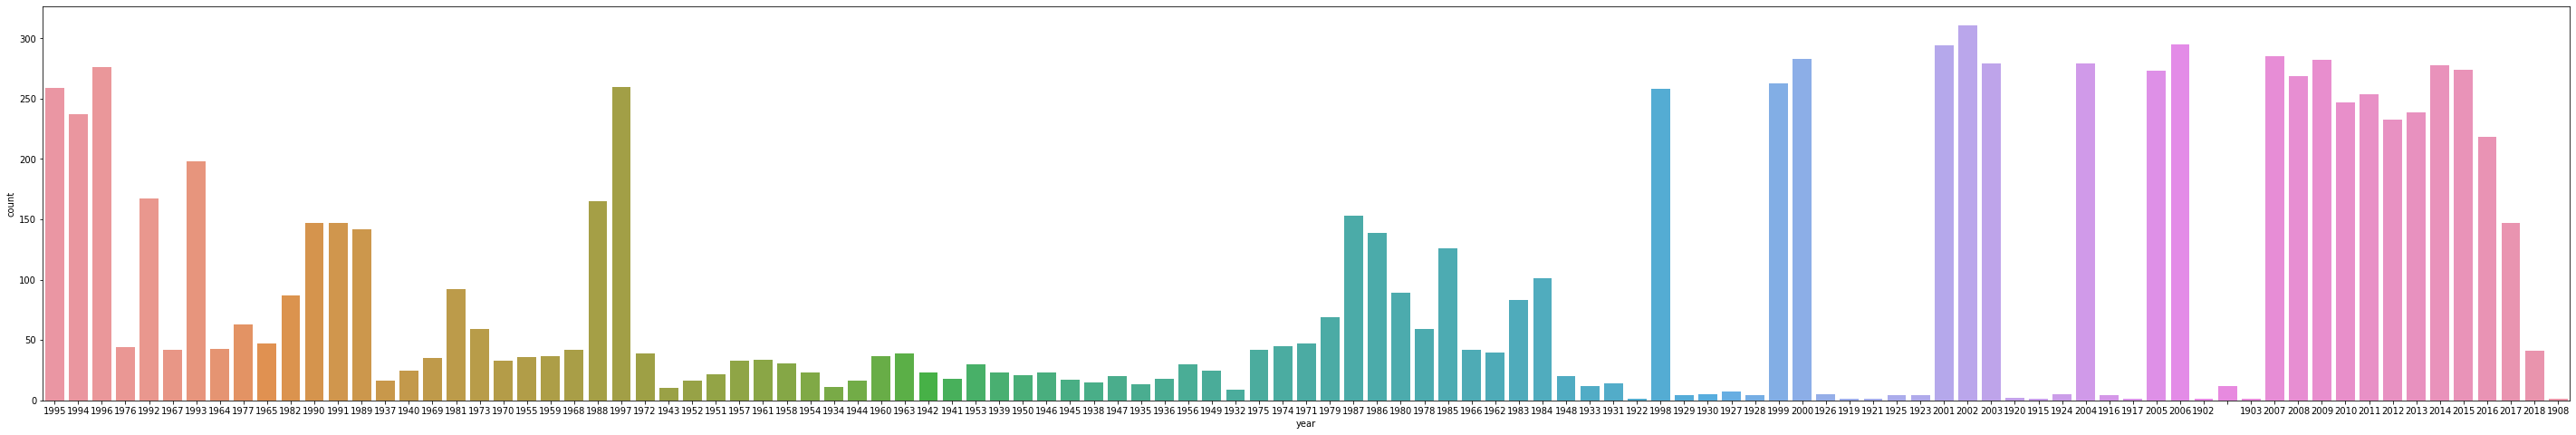

In [17]:
plt.figure(figsize=(50, 8))
sns.countplot(data=movies, x='year')

#### genres 컬럼 정제해서 장르 별 영화보기

In [18]:
genres = list(movies['genres'].apply(lambda x: x.split('|')))

In [19]:
genres_unique = list(set([g for genre in genres for g in genre]))
print(genres_unique)

['Adventure', 'Western', 'Horror', 'Documentary', 'IMAX', 'Comedy', 'Romance', 'Children', '(no genres listed)', 'Crime', 'Mystery', 'Animation', 'Thriller', 'Drama', 'Film-Noir', 'War', 'Sci-Fi', 'Action', 'Musical', 'Fantasy']


In [20]:
for g in genres_unique:
    movies[g] = movies['genres'].apply(lambda x: g in x)

In [21]:
# 우리 데이터를 기준으로 가장 많이 개봉된 장르는 Drama, Comedy, Thriller 순
movies.sum()[genres_unique].sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: object

In [22]:
# 34개밖에 없는데 채워넣어볼까?
movies[movies['(no genres listed)'] == True].sample(1)

,movieId,title,genres,year,Adventure,Western,Horror,Documentary,IMAX,Comedy,...,Mystery,Animation,Thriller,Drama,Film-Noir,War,Sci-Fi,Action,Musical,Fantasy
8684,122888,Ben-hur (2016),(no genres listed),2016,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Ratings

In [23]:
ratings_ = ratings.merge(movies, on='movieId')
print(ratings_.shape)
print(len(ratings_['userId'].unique()))
print(len(ratings_['movieId'].unique())) # 610명 유저의, 9724개의 영화에 대한 기록
ratings_.sample(1)

(100836, 27)
610
9724


,userId,movieId,rating,timestamp,title,genres,year,Adventure,Western,Horror,...,Mystery,Animation,Thriller,Drama,Film-Noir,War,Sci-Fi,Action,Musical,Fantasy
5843,597,1030,2.0,941640746,Pete's Dragon (1977),Adventure|Animation|Children|Musical,1977,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [24]:
# 사람들은 몇 개의 영화에 대해 rating을 남겼는가?
# 제일 많이 남긴 사람은 2698개, 가장 적게 남긴 사람은 20개. 
# 평균은 165개인데, median은 70.5인 것을 보니까 skew가 심한 데이터임을 짐작할 수 있다.
ratings_.groupby('userId')['movieId'].count().describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

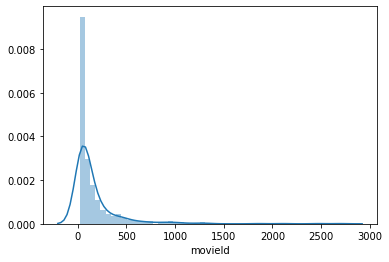

In [25]:
sns.distplot(ratings_.groupby('userId')['movieId'].count())

#### Q. 장르별, 유저별 평균 평점을 계산해주세요.

In [48]:
# Answer

#### Q. 같은 장르라면, 비슷한 평점을 주고 있나요? 이것을 어떻게 확인할 수 있을까요?

In [50]:
# Answer

#### Q. 자주 보는 영화 장르에는 높은 점수를 주나요?

In [49]:
# Answer

#### Q. 특별히 선호하는 시대의 영화가 있나요? (장르 문제와 동일한 방법으로 접근할 수 있음)

In [45]:
# Answer

#### (쉬어가기) Q. 나와 취향이 가장 비슷한 사람을 찾아볼까요?

In [46]:
# Answer

#### (쉬어가기) Q. 내가 좋아하는 영화는 얼마나 많은 사람들이 봤나요? 평균 평점은 어떤가요?

In [47]:
# Answer

#### (쉬어가기) Q. 나는 어떤 장르의 영화를 좋아한다고 생각했나요? 그리고 데이터는 어떻게 말하나요?

In [51]:
# Answer